In [ ]:
import wave
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn

In [ ]:
def waveDetails(filename):
  wav_obj = wave.open(filename, 'rb')
  sample_freq = wav_obj.getframerate()
  #print(sample_freq)
  n_samples = wav_obj.getnframes()
  #print(n_samples)
  t_audio = n_samples/sample_freq
  #print(t_audio)
  n_channels = wav_obj.getnchannels()
  return {"sample_freq":sample_freq,"sample size": n_samples,"length": t_audio,"channels":n_channels}

d=waveDetails("/content/3.wav")
print(d)
#print(waveDetails("/content/3.wav"))

{'sample_freq': 44100, 'sample size': 88200, 'length': 2.0, 'channels': 2}


In [ ]:
def basicPlots(filename):
  d=waveDetails(filename)
  sample_freq=d["sample_freq"]
  n_samples=d["sample size"]
  t_audio=d["length"]
  n_channels=d["channels"]

(1, 87)


AttributeError: module 'sklearn' has no attribute 'preprocessing'

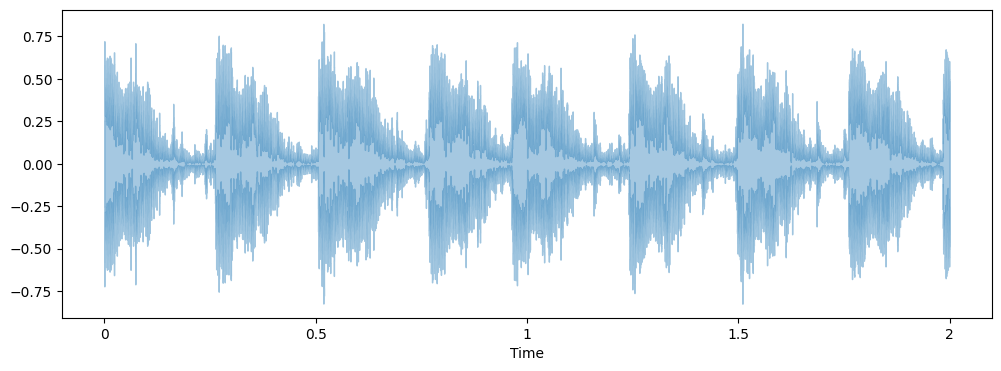

In [ ]:
# Load your audio file and get its sample rate `sr`
x, sr = librosa.load('3.wav')

# Calculate the spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)

# Checking the shape of the spectral centroids array
print(spectral_centroids.shape)  # Example: (1, 775) or similar

# Computing the time variable
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids[0]))  # Correcting for the actual array shape
t = librosa.frames_to_time(frames, sr=sr)

# Normalising the spectral centroid
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)  # Updated to librosa's `waveshow`
plt.plot(t, normalize(spectral_centroids[0]), color='b')  # Spectral centroid plotting
plt.title('Spectral Centroid and Waveform')
plt.show()

(1, 87)


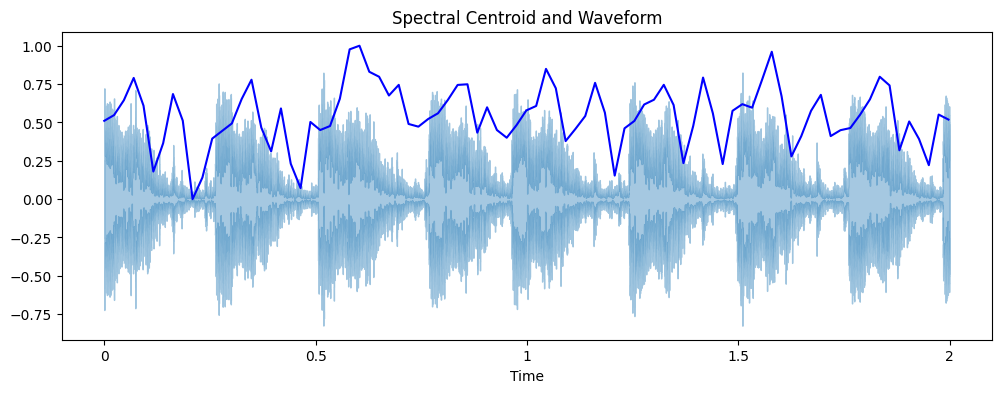

In [ ]:
# Load your audio file and get its sample rate `sr`
x, sr = librosa.load('3.wav')

# Calculate the spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)

# Checking the shape of the spectral centroids array
print(spectral_centroids.shape)  # Example: (1, 775) or similar

# Computing the time variable
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids[0]))  # Correcting for the actual array shape
t = librosa.frames_to_time(frames, sr=sr)

# Normalising the spectral centroid
# import the preprocessing module
from sklearn import preprocessing

def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)  # Updated to librosa's `waveshow`
plt.plot(t, normalize(spectral_centroids[0]), color='b')  # Spectral centroid plotting
plt.title('Spectral Centroid and Waveform')
plt.show()

1. pcm to binary
2. bandpass filter
3. parameter calculation, ml model feeding/training
4. (logical flow)
5. (if gunshot --> tdoa)
6. display in lcd
codes to have ready..to post in github (at least basic simulations using python/ matlab)
 logical flow refers to connecting these functions and compiling them as a single verilog code, and as far as gpt said, our process for detection will be done within 20ms with all the processing..

PCM to Binary

ValueError: x and y must have same first dimension, but have shapes (87,) and (44100,)

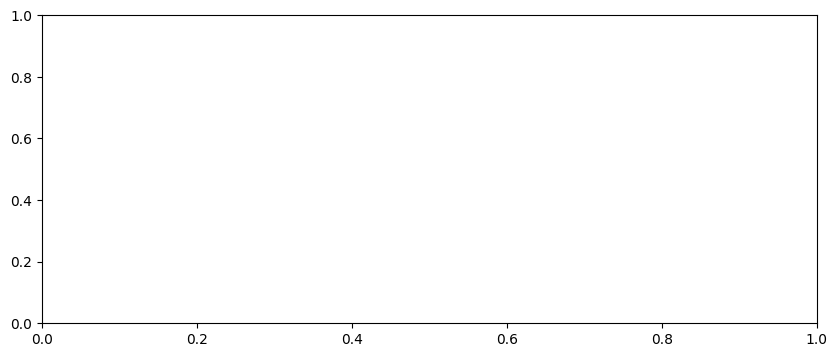

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# # Parameters
# sampling_rate = d['sample_freq']  # samples per second
# duration = 1.0  # in seconds
# frequency = 440  # A4 note frequency in Hz (pure tone)

# # Generate a sine wave (analog signal)
# time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
# analog_signal = 0.5 * np.sin(2 * np.pi * frequency * time)

# Quantization: Normalize the analog signal and scale to PCM values (8-bit example)
num_levels = 256  # 8-bit PCM has 256 levels (2^8)
analog_signal=x
time=t
pcm_signal = np.round((analog_signal + 1) * (num_levels // 2 - 1))

# Plot the analog and PCM-encoded signal
plt.figure(figsize=(10, 4))
plt.plot(time, analog_signal, label='Analog Signal')
plt.step(time, pcm_signal / (num_levels // 2) - 1, where='mid', label='PCM Signal', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('PCM Encoding Simulation')
plt.legend()
plt.show()


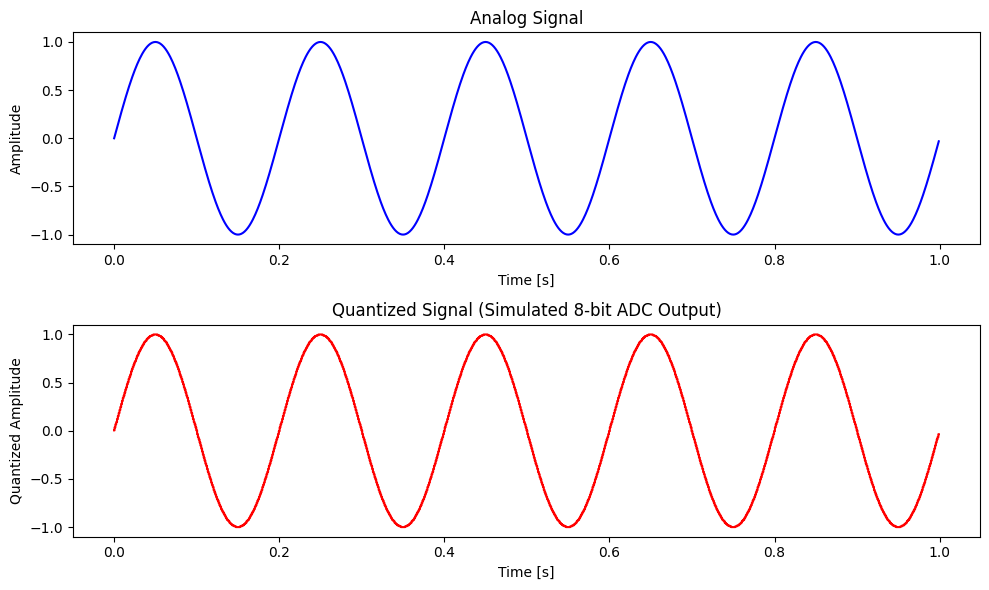

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for ADC simulation
sampling_rate = 1000  # samples per second (sampling frequency)
duration = 1.0  # duration in seconds
frequency = 5  # frequency of the analog signal (Hz)
adc_resolution = 8  # ADC bit depth (8-bit, 16-bit, etc.)
v_ref = 1.0  # Reference voltage for the ADC

# Generate a continuous analog signal (sine wave)
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
analog_signal = v_ref * np.sin(2 * np.pi * frequency * time)  # amplitude scaled to v_ref

# Simulate ADC Quantization:
# Map the analog signal to discrete levels (quantization)
num_levels = 2**adc_resolution  # Number of discrete levels for an n-bit ADC
quantized_signal = np.round(((analog_signal + v_ref) / (2 * v_ref)) * (num_levels - 1))

# Reconstruct the quantized signal for comparison (convert back to analog levels)
reconstructed_signal = (quantized_signal / (num_levels - 1)) * 2 * v_ref - v_ref

# Plot the original analog signal and the quantized signal
plt.figure(figsize=(10, 6))

# Plot the original analog signal
plt.subplot(2, 1, 1)
plt.plot(time, analog_signal, label='Analog Signal', color='blue')
plt.title("Analog Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Plot the quantized signal (ADC output)
plt.subplot(2, 1, 2)
plt.step(time, reconstructed_signal, label='Quantized Signal (ADC Output)', where='mid', color='red')
plt.title(f"Quantized Signal (Simulated {adc_resolution}-bit ADC Output)")
plt.xlabel("Time [s]")
plt.ylabel("Quantized Amplitude")

plt.tight_layout()
plt.show()


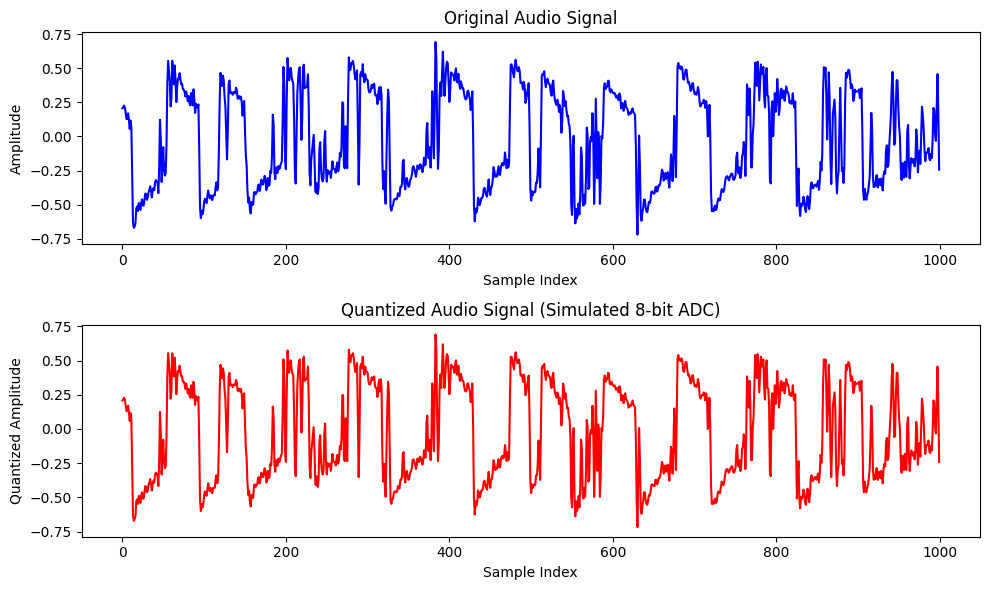

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load the audio file (mono) and extract sampling rate
audio_path = '3.wav'  # Replace with the path to your audio file
audio_signal, original_sampling_rate = librosa.load(audio_path, sr=None)

# Simulate ADC Quantization parameters
adc_resolution = 8  # ADC bit depth (8-bit, 16-bit, etc.)
v_ref = np.max(np.abs(audio_signal))  # Use max amplitude as reference voltage
num_levels = 2**adc_resolution  # Number of discrete levels for an n-bit ADC

# Normalize the audio signal to be between -1 and 1 (like an analog signal)
audio_signal_normalized = audio_signal / v_ref

# Quantize the normalized audio signal
quantized_signal = np.round((audio_signal_normalized + 1) * (num_levels // 2 - 1))

# Reconstruct the quantized signal (convert back to analog levels)
reconstructed_signal = (quantized_signal / (num_levels // 2 - 1)) - 1
reconstructed_signal *= v_ref  # Scale back to original reference voltage

# Plot the original and quantized signals for a small part of the audio (first 1000 samples)
plt.figure(figsize=(10, 6))

# Plot original audio signal (analog)
plt.subplot(2, 1, 1)
plt.plot(audio_signal[:1000], label='Original Audio Signal', color='blue')
plt.title("Original Audio Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

# Plot quantized audio signal (ADC output)
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal[:1000], label=f'Quantized Signal ({adc_resolution}-bit ADC)', color='red')
plt.title(f"Quantized Audio Signal (Simulated {adc_resolution}-bit ADC)")
plt.xlabel("Sample Index")
plt.ylabel("Quantized Amplitude")

plt.tight_layout()
plt.show()

# If you want to save the quantized audio to a file:
import soundfile as sf
sf.write('quantized_audio.wav', reconstructed_signal, original_sampling_rate)


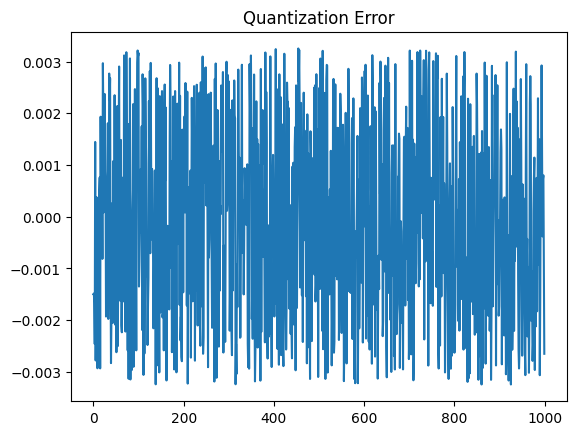

In [ ]:
error = audio_signal - reconstructed_signal
plt.plot(error[:1000])
plt.title("Quantization Error")
plt.show()

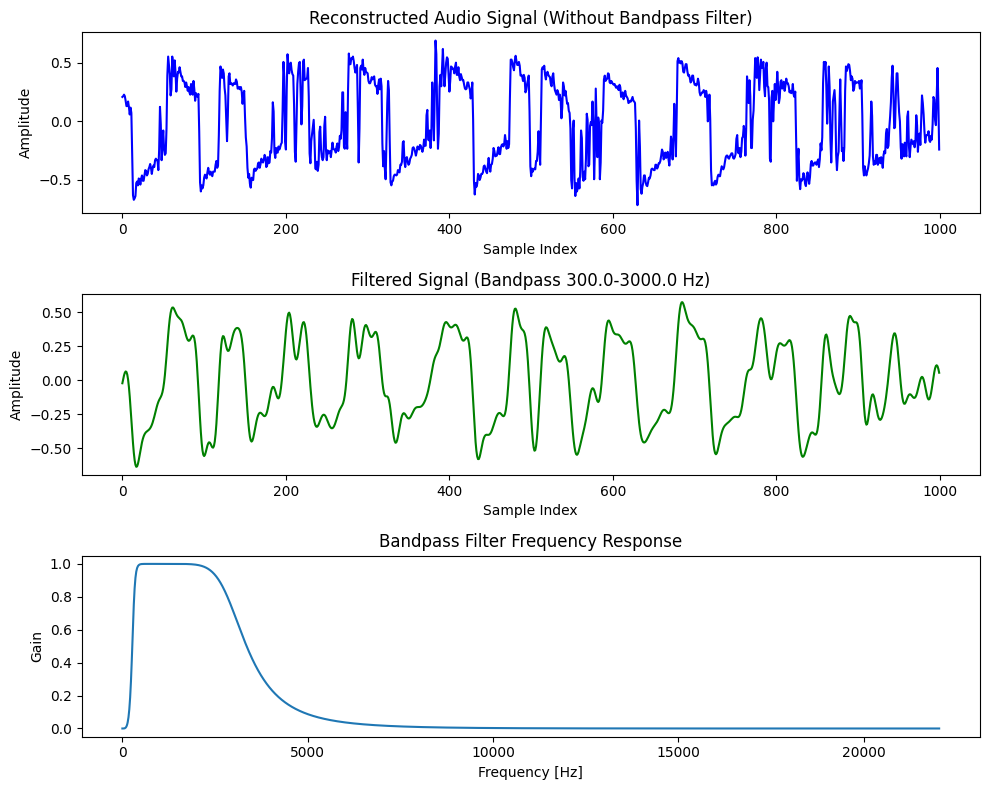

In [ ]:
import scipy.signal as signal

# Define the bandpass filter parameters
low_cutoff = 300.0  # Lower cutoff frequency in Hz
high_cutoff = 3000.0  # Upper cutoff frequency in Hz
order = 4  # Order of the Butterworth filter

# Design the Butterworth bandpass filter
nyquist = 0.5 * original_sampling_rate  # Nyquist frequency
low = low_cutoff / nyquist
high = high_cutoff / nyquist
b, a = signal.butter(order, [low, high], btype='band')  # Design filter coefficients

# Apply the bandpass filter to the reconstructed signal
filtered_signal = signal.filtfilt(b, a, reconstructed_signal)

# Plot the original, quantized, and filtered signals for the first 1000 samples
plt.figure(figsize=(10, 8))

# Original reconstructed signal (without filter)
plt.subplot(3, 1, 1)
plt.plot(reconstructed_signal[:1000], label='Reconstructed Signal', color='blue')
plt.title('Reconstructed Audio Signal (Without Bandpass Filter)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Filtered signal
plt.subplot(3, 1, 2)
plt.plot(filtered_signal[:1000], label='Filtered Signal', color='green')
plt.title(f'Filtered Signal (Bandpass {low_cutoff}-{high_cutoff} Hz)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Plot Frequency Response of the filter
w, h = signal.freqz(b, a, worN=2000)
plt.subplot(3, 1, 3)
plt.plot((w / np.pi) * nyquist, np.abs(h), label='Frequency Response')
plt.title('Bandpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')

plt.tight_layout()
plt.show()

# If you want to save the filtered audio to a file:
import soundfile as sf
sf.write('filtered_audio.wav', filtered_signal, original_sampling_rate)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load audio file
audio_path = 'filtered_audio.wav'  # Replace with your audio file path
audio_signal, sampling_rate = librosa.load(audio_path, sr=None)

# Extract Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=audio_signal, sr=sampling_rate)[0]

# Extract Zero Crossing Rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_signal)[0]

# Time axis for plotting (in seconds)
frames = range(len(spectral_centroid))
t_spectral = librosa.frames_to_time(frames, sr=sampling_rate)

frames_zcr = range(len(zero_crossing_rate[0]))
t_zcr = librosa.frames_to_time(frames_zcr, sr=sampling_rate)

# Plot Spectral Centroid
plt.figure(figsize=(12, 6))

# Original waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio_signal, sr=sampling_rate, alpha=0.5)
plt.plot(t_spectral, spectral_centroid, color='r', label='Spectral Centroid')
plt.title('Spectral Centroid of the Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Centroid (Hz)')
plt.legend(loc='upper right')

# Plot Zero Crossing Rate
plt.subplot(2, 1, 2)
librosa.display.waveshow(audio_signal, sr=sampling_rate, alpha=0.5)
plt.plot(t_zcr, zero_crossing_rate[0], color='g', label='Zero Crossing Rate')
plt.title('Zero Crossing Rate of the Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Zero Crossing Rate')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


TypeError: object of type 'numpy.float64' has no len()

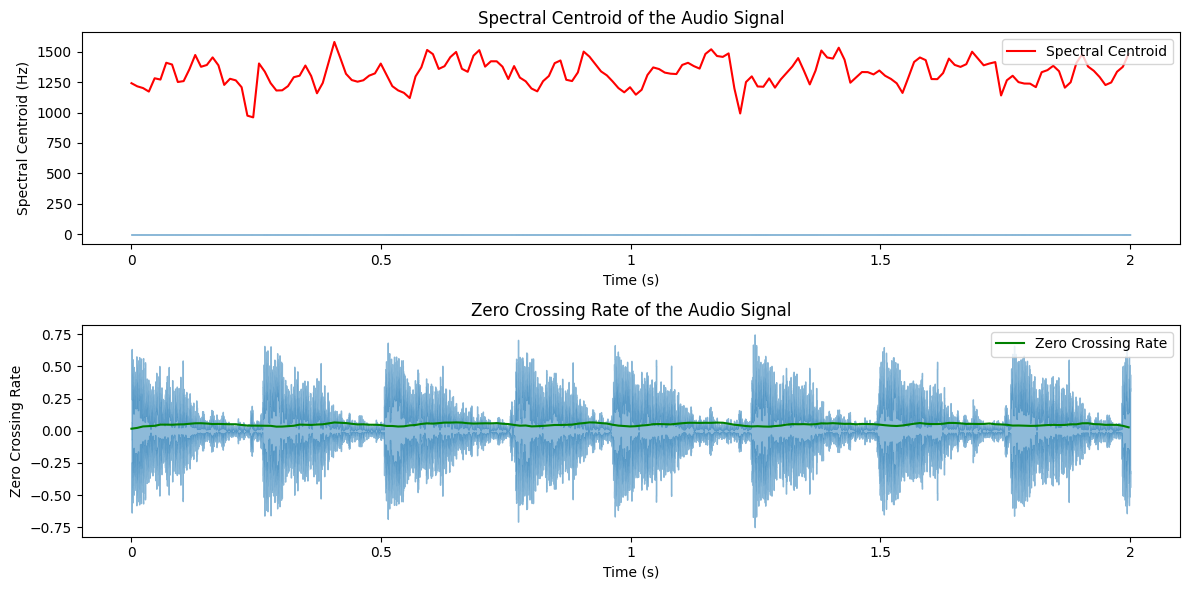

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load audio file
audio_path = 'filtered_audio.wav'  # Replace with your audio file path
audio_signal, sampling_rate = librosa.load(audio_path, sr=None)

# Extract Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=audio_signal, sr=sampling_rate)[0]

# Extract Zero Crossing Rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_signal)[0]

# Time axis for plotting (in seconds)
frames = range(len(spectral_centroid))
t_spectral = librosa.frames_to_time(frames, sr=sampling_rate)

#The zero_crossing_rate is a 1D array, so you should use its length directly
frames_zcr = range(len(zero_crossing_rate))
t_zcr = librosa.frames_to_time(frames_zcr, sr=sampling_rate)

# Plot Spectral Centroid
plt.figure(figsize=(12, 6))

# Original waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio_signal, sr=sampling_rate, alpha=0.5)
plt.plot(t_spectral, spectral_centroid, color='r', label='Spectral Centroid')
plt.title('Spectral Centroid of the Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Spectral Centroid (Hz)')
plt.legend(loc='upper right')

# Plot Zero Crossing Rate
plt.subplot(2, 1, 2)
librosa.display.waveshow(audio_signal, sr=sampling_rate, alpha=0.5)
plt.plot(t_zcr, zero_crossing_rate, color='g', label='Zero Crossing Rate') #Use zero_crossing_rate directly here
plt.title('Zero Crossing Rate of the Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Zero Crossing Rate')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
!pip install kaggle
from google.colab import files

# uploaded = files.upload()
# for name, data in uploaded.items():
#   with open(name, 'wb') as f:
#     f.write(data)

import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content'

!kaggle competitions download -c gunshot-audio-dataset
folder_path = '/content/drive/MyDrive/sih2024/gunshot_dataset'
os.makedirs(folder_path, exist_ok=True)

!unzip gunshot-audio-dataset.zip -d "$folder_path"

403 - Forbidden - Permission 'competitions.participate' was denied
unzip:  cannot find or open gunshot-audio-dataset.zip, gunshot-audio-dataset.zip.zip or gunshot-audio-dataset.zip.ZIP.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import scipy.signal as signal

def getfeatures(file):
  # Load the audio file (mono) and extract sampling rate
  audio_path = file  # Replace with the path to your audio file
  audio_signal, original_sampling_rate = librosa.load(audio_path, sr=None)

  # Simulate ADC Quantization parameters
  adc_resolution = 8  # ADC bit depth (8-bit, 16-bit, etc.)
  v_ref = np.max(np.abs(audio_signal))  # Use max amplitude as reference voltage
  num_levels = 2**adc_resolution  # Number of discrete levels for an n-bit ADC

  # Normalize the audio signal to be between -1 and 1 (like an analog signal)
  audio_signal_normalized = audio_signal / v_ref

  # Quantize the normalized audio signal
  quantized_signal = np.round((audio_signal_normalized + 1) * (num_levels // 2 - 1))

  # Reconstruct the quantized signal (convert back to analog levels)
  reconstructed_signal = (quantized_signal / (num_levels // 2 - 1)) - 1
  reconstructed_signal *= v_ref  # Scale back to original reference voltage
  # Define the bandpass filter parameters
  low_cutoff = 300.0  # Lower cutoff frequency in Hz
  high_cutoff = 3000.0  # Upper cutoff frequency in Hz
  order = 4  # Order of the Butterworth filter

  # Design the Butterworth bandpass filter
  nyquist = 0.5 * original_sampling_rate  # Nyquist frequency
  low = low_cutoff / nyquist
  high = high_cutoff / nyquist
  b, a = signal.butter(order, [low, high], btype='band')  # Design filter coefficients

  # Apply the bandpass filter to the reconstructed signal
  filtered_signal = signal.filtfilt(b, a, reconstructed_signal)
  spectral_centroid = librosa.feature.spectral_centroid(y=filtered_signal, sr=original_sampling_rate)[0]

  # Zero Crossing Rate (shape = (n_frames,))
  zero_crossing_rate = librosa.feature.zero_crossing_rate(y=filtered_signal)[0]

  # Optional: You may want to calculate additional features, such as mean, variance, etc.
  # This helps create a more robust feature set.
  # features = np.array([
  #     np.mean(spectral_centroid), np.std(spectral_centroid),  # Spectral Centroid features
  #     np.mean(zero_crossing_rate), np.std(zero_crossing_rate) # Zero Crossing Rate features
  # ])
  features = np.array([
      spectral_centroid, spectral_centroid,  # Spectral Centroid features
      zero_crossing_rate, zero_crossing_rate # Zero Crossing Rate features
  ])
  return features

files=['/content/3 (15).wav','/content/construction-drilling-24221.mp3','/content/construction-site-49508.mp3','/content/desert-eagle-gunshot-14622.mp3','/content/explosion-at-a-construction-site-61255.mp3','/content/nail-gun-bangs-distant-urban-construction-77mel-190917-62217.mp3','/content/single-gunshot-54-40780.mp3','/content/single-pistol-gunshot-42-40781.mp3']
y=[1,0,0,1,0,0,1,1]

features=[]
for i in files:
  features.append(getfeatures(i))
#features=np.array(features)
X = features  # Feature matrix (you would collect this for multiple audio files)
#y = np.array([1])  # Labels (for binary classification or multiclass)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Test the classifier
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (6, 4) + inhomogeneous part.

In [4]:
classifier.predict([getfeatures('4 (12).wav')])

array([1])

In [5]:
classifier.predict([getfeatures('/content/Clap.m4a')])

<ipython-input-2-59268890cc3b>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_signal, original_sampling_rate = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


array([1])

In [ ]:
import numpy as np
import librosa
from scipy.stats import skew, kurtosis

# Load the audio file
audio_path = 'your_audio_file.wav'
audio_signal, sampling_rate = librosa.load(audio_path, sr=None)

# Extract features: Spectral Centroid and Zero Crossing Rate (frame-wise)
spectral_centroid = librosa.feature.spectral_centroid(y=audio_signal, sr=sampling_rate)[0]
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio_signal)[0]

# Compute other features for more robust feature extraction

# Higher-order statistics for Spectral Centroid
mean_spectral_centroid = np.mean(spectral_centroid)
std_spectral_centroid = np.std(spectral_centroid)
skewness_spectral_centroid = skew(spectral_centroid)
kurtosis_spectral_centroid = kurtosis(spectral_centroid)
range_spectral_centroid = np.ptp(spectral_centroid)  # Peak to peak

# Higher-order statistics for Zero Crossing Rate
mean_zcr = np.mean(zero_crossing_rate)
std_zcr = np.std(zero_crossing_rate)
skewness_zcr = skew(zero_crossing_rate)
kurtosis_zcr = kurtosis(zero_crossing_rate)
range_zcr = np.ptp(zero_crossing_rate)  # Peak to peak

# Extract other frequency-based features like MFCCs
mfccs = librosa.feature.mfcc(y=audio_signal, sr=sampling_rate, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)
mfccs_std = np.std(mfccs, axis=1)

# RMS Energy
rms_energy = librosa.feature.rms(y=audio_signal)[0]
mean_rms = np.mean(rms_energy)
std_rms = np.std(rms_energy)

# Delta and Delta-Delta (First and Second Order Derivatives of MFCCs)
mfcc_delta = librosa.feature.delta(mfccs)
mfcc_delta2 = librosa.feature.delta(mfccs, order=2)

# Combine all features into a single feature vector
features = np.hstack([
    mean_spectral_centroid, std_spectral_centroid, skewness_spectral_centroid, kurtosis_spectral_centroid, range_spectral_centroid,
    mean_zcr, std_zcr, skewness_zcr, kurtosis_zcr, range_zcr,
    mfccs_mean, mfccs_std,
    mean_rms, std_rms,
    mfcc_delta.mean(axis=1), mfcc_delta2.mean(axis=1)
])

# Now, 'features' is a comprehensive vector that captures more of the audio signal's properties


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import scipy.signal as signal
from scipy.stats import skew, kurtosis

def getfeatures(file):
  # Load the audio file (mono) and extract sampling rate
  audio_path = file  # Replace with the path to your audio file
  audio_signal, original_sampling_rate = librosa.load(audio_path, sr=None)

  # Simulate ADC Quantization parameters
  adc_resolution = 8  # ADC bit depth (8-bit, 16-bit, etc.)
  v_ref = np.max(np.abs(audio_signal))  # Use max amplitude as reference voltage
  num_levels = 2**adc_resolution  # Number of discrete levels for an n-bit ADC

  # Normalize the audio signal to be between -1 and 1 (like an analog signal)
  audio_signal_normalized = audio_signal / v_ref

  # Quantize the normalized audio signal
  quantized_signal = np.round((audio_signal_normalized + 1) * (num_levels // 2 - 1))

  # Reconstruct the quantized signal (convert back to analog levels)
  reconstructed_signal = (quantized_signal / (num_levels // 2 - 1)) - 1
  reconstructed_signal *= v_ref  # Scale back to original reference voltage
  # Define the bandpass filter parameters
  low_cutoff = 300.0  # Lower cutoff frequency in Hz
  high_cutoff = 3000.0  # Upper cutoff frequency in Hz
  order = 4  # Order of the Butterworth filter

  # Design the Butterworth bandpass filter
  nyquist = 0.5 * original_sampling_rate  # Nyquist frequency
  low = low_cutoff / nyquist
  high = high_cutoff / nyquist
  b, a = signal.butter(order, [low, high], btype='band')  # Design filter coefficients

  # Apply the bandpass filter to the reconstructed signal
  filtered_signal = signal.filtfilt(b, a, reconstructed_signal)
  spectral_centroid = librosa.feature.spectral_centroid(y=filtered_signal, sr=original_sampling_rate)[0]
  zero_crossing_rate = librosa.feature.zero_crossing_rate(y=filtered_signal)[0]

  # Compute other features for more robust feature extraction

  # Higher-order statistics for Spectral Centroid
  mean_spectral_centroid = np.mean(spectral_centroid)
  std_spectral_centroid = np.std(spectral_centroid)
  skewness_spectral_centroid = skew(spectral_centroid)
  kurtosis_spectral_centroid = kurtosis(spectral_centroid)
  range_spectral_centroid = np.ptp(spectral_centroid)  # Peak to peak

  # Higher-order statistics for Zero Crossing Rate
  mean_zcr = np.mean(zero_crossing_rate)
  std_zcr = np.std(zero_crossing_rate)
  skewness_zcr = skew(zero_crossing_rate)
  kurtosis_zcr = kurtosis(zero_crossing_rate)
  range_zcr = np.ptp(zero_crossing_rate)  # Peak to peak

  # Extract other frequency-based features like MFCCs
  mfccs = librosa.feature.mfcc(y=filtered_signal, sr=original_sampling_rate, n_mfcc=13)
  mfccs_mean = np.mean(mfccs, axis=1)
  mfccs_std = np.std(mfccs, axis=1)

  # RMS Energy
  rms_energy = librosa.feature.rms(y=filtered_signal)[0]
  mean_rms = np.mean(rms_energy)
  std_rms = np.std(rms_energy)

  # Delta and Delta-Delta (First and Second Order Derivatives of MFCCs)
  mfcc_delta = librosa.feature.delta(mfccs)
  mfcc_delta2 = librosa.feature.delta(mfccs, order=2)

  # Combine all features into a single feature vector
  features = np.hstack([
      mean_spectral_centroid, std_spectral_centroid, skewness_spectral_centroid, kurtosis_spectral_centroid, range_spectral_centroid,
      mean_zcr, std_zcr, skewness_zcr, kurtosis_zcr, range_zcr,
      mfccs_mean, mfccs_std,
      mean_rms, std_rms,
      mfcc_delta.mean(axis=1), mfcc_delta2.mean(axis=1)
  ])
  return features

files=['/content/3 (15).wav','/content/construction-drilling-24221.mp3','/content/construction-site-49508.mp3','/content/desert-eagle-gunshot-14622.mp3','/content/explosion-at-a-construction-site-61255.mp3','/content/nail-gun-bangs-distant-urban-construction-77mel-190917-62217.mp3','/content/single-gunshot-54-40780.mp3','/content/single-pistol-gunshot-42-40781.mp3']
y=[1,0,0,1,0,0,1,1]

features=[]
for i in files:
  features.append(getfeatures(i))
#features=np.array(features)
X = features  # Feature matrix (you would collect this for multiple audio files)
#y = np.array([1])  # Labels (for binary classification or multiclass)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Test the classifier
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [3]:
classifier.predict([getfeatures('4 (12).wav')])

array([1])

In [4]:
classifier.predict([getfeatures('/content/Clap.m4a')])

<ipython-input-2-d2d58fff701a>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_signal, original_sampling_rate = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


array([0])

In [14]:
classifier.predict([getfeatures('/content/Noise.m4a')])

<ipython-input-9-d2d58fff701a>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_signal, original_sampling_rate = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


array([0])

In [6]:
classifier.predict([getfeatures('/content/2 (1).wav')])

array([1])

In [5]:
classifier.predict([getfeatures('/content/2 (11).wav')])

array([1])

In [13]:
import pickle
import joblib
# Save the trained model as a pickle string.
saved_model = pickle.dumps(classifier)
joblib.dump(classifier, 'model_gunshot.pkl')

['model_gunshot.pkl']

Conversion to FPGA code

In [17]:
!pip install skl2onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but 

In [8]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

# Define the input type for ONNX (based on the shape of your features)
initial_type = [('float_input', FloatTensorType([None, np.array(X_train).shape[1]]))]

# Convert the decision tree classifier to ONNX format
onnx_model = convert_sklearn(classifier, initial_types=initial_type)

# Save the ONNX model to a file
with open("decision_tree.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
